# Student Name: Qadeer Hussain

# Lecture: Greg Doyle

# Topic: K Means Clustering

# Clustered movie dataset by genres and ratings

# Last Modified: 02 Feb 2025

In [1]:
# Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# Displaying the first few rows of each DataFrame
movies.head(), ratings.head(), tags.head(), links.head()

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       

In [3]:
# Checking for missing values in each of the DataFrames: movies, ratings, tags, links
missing_values_movies = movies.isnull().sum()
missing_values_ratings = ratings.isnull().sum()
missing_values_tags = tags.isnull().sum()
missing_values_links = links.isnull().sum()

In [4]:
missing_values_movies

movieId    0
title      0
genres     0
dtype: int64

In [5]:
missing_values_ratings

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
missing_values_tags

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [7]:
missing_values_links

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [8]:
# Dropping rows where 'tmdbId' is missing in the 'links' DataFrame
links_clean = links.dropna(subset=['tmdbId'])

In [9]:
# Check correct rows were dropped
links_clean.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [10]:
# Calculating the average rating and the number of ratings for each movie
ratings_features = ratings.groupby('movieId').agg(
    average_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

# Merging these new features back into the movies DataFrame
movies_enhanced = movies.merge(ratings_features, on='movieId', how='left')

# Checking the enhanced movies DataFrame
movies_enhanced.head()

,movieId,title,genres,average_rating,num_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [11]:
check_missing_ratings = movies_enhanced[['average_rating', 'num_ratings']].isnull().sum()
check_missing_ratings, check_missing_ratings.shape

(average_rating    18
 num_ratings       18
 dtype: int64,
 (2,))

In [12]:
movies_enhanced_clean = movies_enhanced.dropna(subset=['average_rating', 'num_ratings'])

In [13]:
# Applying One-Hot Encoding to the 'genres' column
genres_encoded = movies_enhanced_clean['genres'].str.get_dummies(sep='|')

# Merging the encoded genres back into the movies_enhanced DataFrame
movies_final = pd.concat([movies_enhanced_clean, genres_encoded], axis=1)

# Dropping the original 'genres' column as it's no longer needed
movies_final.drop('genres', axis=1, inplace=True)

# Displaying the updated DataFrame with new features
movies_final.head()

,movieId,title,average_rating,num_ratings,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.920930,215.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.431818,110.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.259615,52.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.357143,7.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.071429,49.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Selecting the numerical columns for normalization
numerical_features = ['average_rating', 'num_ratings']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the numerical columns
movies_final[numerical_features] = scaler.fit_transform(movies_final[numerical_features])

# Checking the updated DataFrame to confirm normalization
movies_final.head()

,movieId,title,average_rating,num_ratings,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0.760207,0.652439,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0.651515,0.332317,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0.613248,0.155488,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0.412698,0.018293,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0.571429,0.146341,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


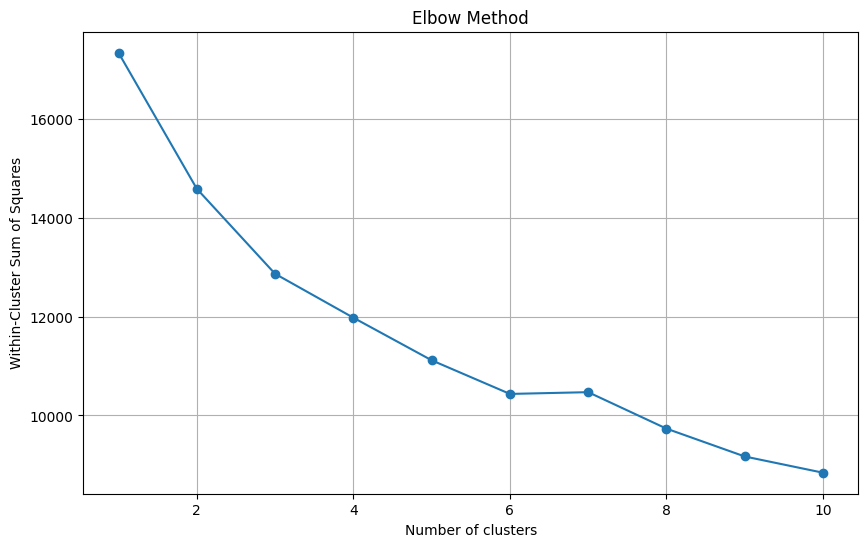

In [15]:
# Reapplying the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(movies_final.drop(['movieId', 'title'], axis=1))
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

In [16]:
# Applying K-means clustering with the optimal number of clusters determined which is 4
kmeans = KMeans(n_clusters=4, init='k-means++')
cluster_labels = kmeans.fit_predict(movies_final.drop(['movieId', 'title'], axis=1))

# Adding the cluster labels to the movies_final dataframe
movies_final['Cluster'] = cluster_labels

# Display head of movies final dataframe
movies_final.head()

,movieId,title,average_rating,num_ratings,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,Toy Story (1995),0.760207,0.652439,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3
1,2,Jumanji (1995),0.651515,0.332317,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),0.613248,0.155488,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0.412698,0.018293,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2
4,5,Father of the Bride Part II (1995),0.571429,0.146341,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


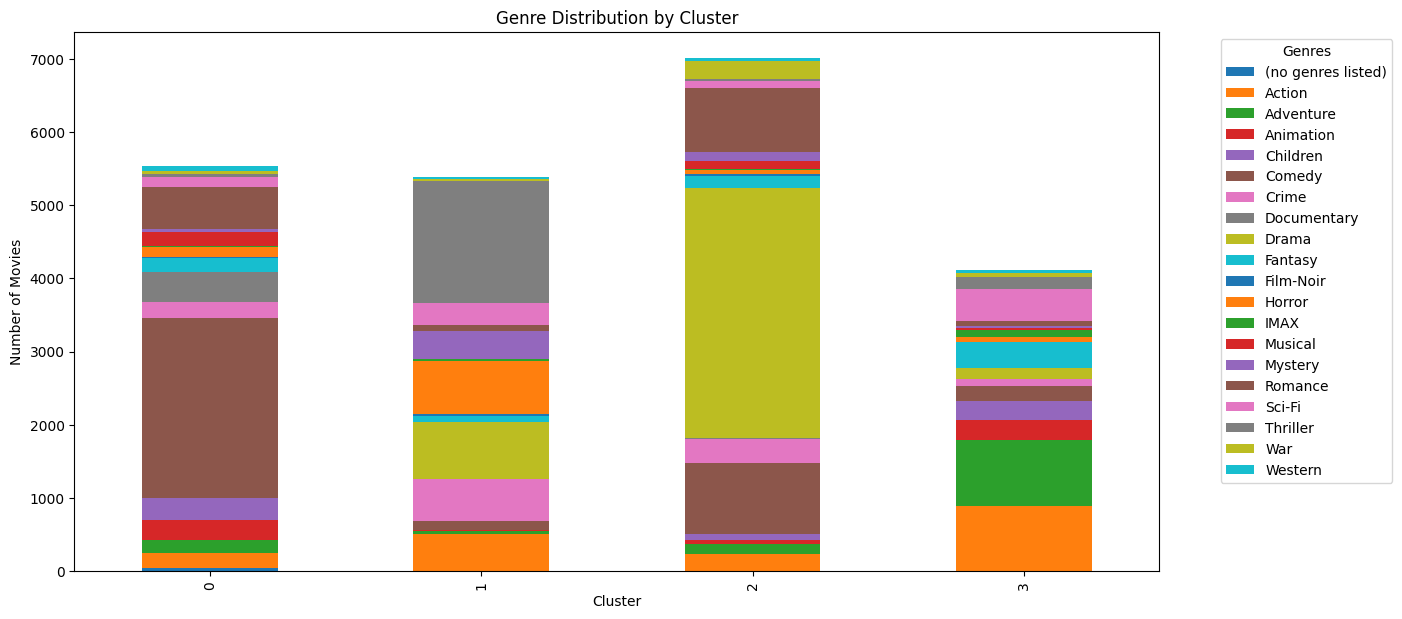

In [17]:
genre_columns = [col for col in movies_final.columns if col not in ['movieId', 'title', 'average_rating', 'num_ratings', 'Cluster']]

# Summing up genres by cluster
cluster_genre = movies_final.groupby('Cluster')[genre_columns].sum()

# Plotting
cluster_genre.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Genre Distribution by Cluster')
plt.ylabel('Number of Movies')
plt.xlabel('Cluster')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

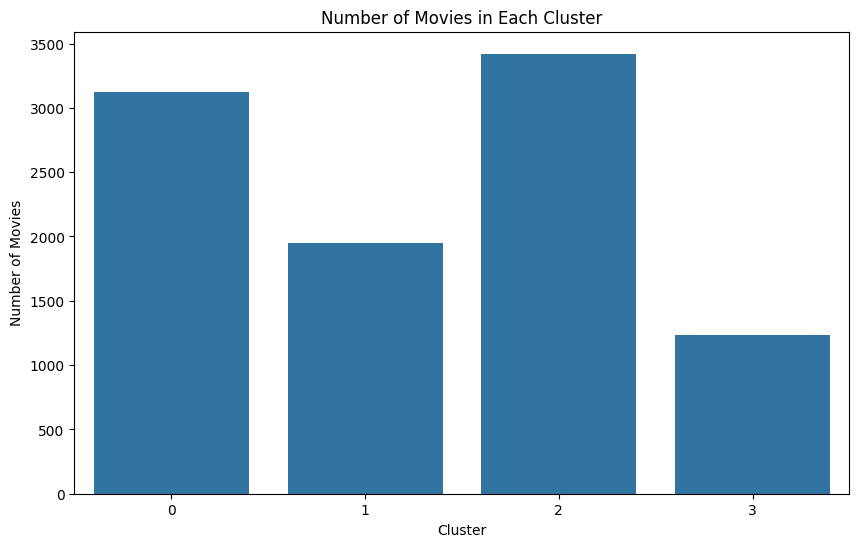

In [18]:
# Counting movies in each cluster
cluster_sizes = movies_final['Cluster'].value_counts().sort_index()

# Plotting cluster sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('Number of Movies in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.show()